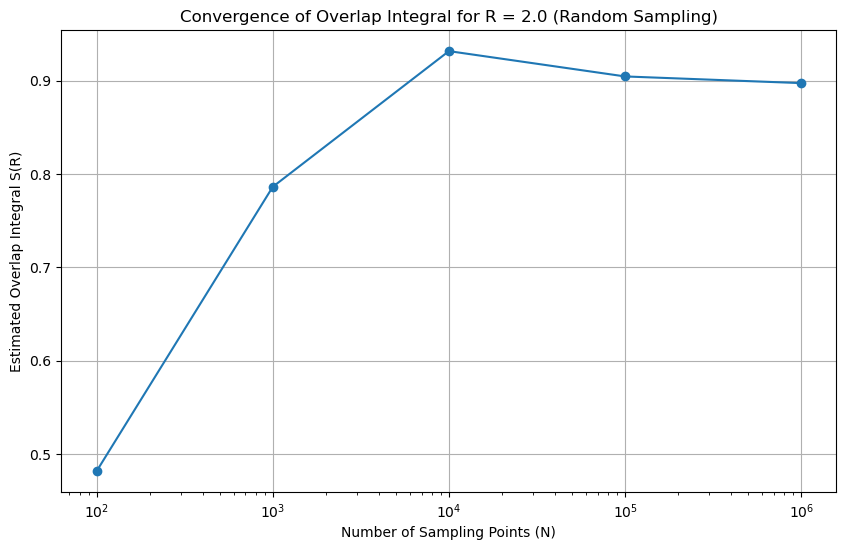


Analysis of Convergence:
As the number of sampling points (N) increases, the estimated overlap integral S(R) is expected to converge towards the true value.
The plot shows how the estimate changes with increasing N. Due to the nature of Monte Carlo integration, there will be fluctuations, especially for smaller N.
The convergence rate for random sampling is typically proportional to 1/sqrt(N).


In [1]:
import numpy as np                    # Imports the NumPy library as np
import matplotlib.pyplot as plt       # Imports the plyplot module of Matplot library as plt

np.random.seed(42)                    # Sets a random seed

def psi_2p_z(x, y, z):                # Defines the 2p orbital along the z-axis
  r = np.sqrt(x**2 + y**2 + z**2)     # Defines the radial distance as a function of x,y,z coordinates
  cos_theta = z / r                   # Defines the cosine of angle theta in terms of z coordinate and r
  a0 = 1                              # Sets Bohr radius equal to 1 atomic units

  return 1 / (4 * np.sqrt(2 * np.pi * a0**(3 / 2))) * (r / a0) * cos_theta * np.exp(-r / (2 * a0))                 # Returns the 2pz orbital



R = 2.0                               # Sets the separation distance as 2 atomic units

side_length = 20.0                    # Sets the intial side length as 20 atomic units
volume = side_length**3               # Defines the volume as cube of side length
lower_bound = -side_length / 2        # Sets the lower bound of cubic region
upper_bound = side_length / 2         # Sets the upper bound of cubic region

N_values = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]      # Creates a list of N values from 10^2 to 10^8
estimated_S_values = []                                                  # Creates a list of estimated overlap values

for N in N_values:
    x_samples = np.random.uniform(lower_bound, upper_bound, N)           # Generates random points in x from lower to upper bound for a given number of points
    y_samples = np.random.uniform(lower_bound, upper_bound, N)           # Generates random points in y from lower to upper bound for a given number of points
    z_samples = np.random.uniform(lower_bound, upper_bound, N)           # Generates random points in z from lower to upper bound for a given number of points

    integrand_sum = 0                                                    # Sets initial integrand sum as zero
    for i in range(N):                                                   # For each value in the range of the number of points
        psi1 = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] + R/2)  # Overlap of orbitals at position (0, 0, R/2)
        psi2 = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] - R/2)  # Overlap of orbitals at position (0, 0, -R/2)
        integrand_sum += psi1 * psi2                                     # Updates integrand sum with new sum

    estimated_S = (volume) * (integrand_sum / N)        # Defines the estimate overlap integral as the product of volume and and average value over all sampled points
    estimated_S_values.append(estimated_S)              # Appends new estimation to list
    
plt.figure(figsize = (10, 6))                           # Creates a 10 inch by 6 inch plot
plt.plot(N_values, estimated_S_values, marker = 'o')    # Plots estimated orbital overlap versus number of points for random sampling
plt.xscale('log')                                       # Creates log scale on x-axis
plt.xlabel('Number of Sampling Points (N)')             # Creates x-axis label
plt.ylabel('Estimated Overlap Integral S(R)')           # Creates y-axis label
plt.title(f'Convergence of Overlap Integral for R = {R} (Random Sampling)')      # Creates title

plt.grid(True)                                          # Enables gridlines
plt.show()                                              # Shows plot

print("Estimated S(R) values for different N:")                           # Prints overlap integral for different number of points
for i in range(len(N_values)):                                            # Looks at each number of points from 10^2 to 10^8
    print(f"N = {N_values[i]}: S(R) ≈ {estimated_S_values[i]:.3f}")       # Prints overlap integral to 3 decimal places



print("Analysis of Convergence for Random Sampling:")                     # Random Sampling Discussion
print("As the number of sampling points increases, the estimated overlap integral of the 2pz orbital converges to a single value, appromximately 0.727. This is because each additional value of the estimated overlap integral is averaged over all of the sample points. As a result, there is a large amount of fluctuation in the overlap integral values for a small number of points, and little fluctuation for a large number of points, indicating a higher accuracy for a larger sample size.")

In [2]:
import numpy as np                    # Imports the NumPy library as np
import matplotlib.pyplot as plt       # Imports the plyplot module of Matplot library as plt

np.random.seed(42)                    # Sets a random seed

def sample_from_exp_minus_r_r_squared_sin_theta(N):                      # Defines the sample space
    r_samples = np.random.gamma(shape = 3, scale = 1, size = N)          # Samples the radial distance using a gamma distribution
 
    u_theta = np.random.uniform(0, 1, N)                                 # Defines theta polar coordinate
    theta_samples = np.arccos(1 - 2 * u_theta)                           # Samples theta polar coordinate over sample space

    phi_samples = np.random.uniform(0, 2 * np.pi, N)                     # Samples phi polar coordinate over sample space

    x_samples = r_samples * np.sin(theta_samples) * np.cos(phi_samples)  # Converts polar coordinate to x coordinate
    y_samples = r_samples * np.sin(theta_samples) * np.sin(phi_samples)  # Converts polar coordinate to y coordinate
    z_samples = r_samples * np.cos(theta_samples)                        # Converts polar coordinate to z coordinate

    return x_samples, y_samples, z_samples, r_samples, theta_samples, phi_samples     # Returns coordinate and sample space information

def g_unnormalized(r):                   # Defines unnormalized density function
    return np.exp(-r)                    # Returns unnormalized density function

estimated_S_is_values_exp_r = []         # Creates a list for the estimated overlap integral values

for N in N_values:                       # Looks at each number of samplings (10^2 to 10^8)
    x_samples, y_samples, z_samples, r_samples, theta_samples, phi_samples = sample_from_exp_minus_r_r_squared_sin_theta(N)         # Looks at coordinate and sample space information

    integrand_is_sum_exp_r = 0                                                           # Defines the integrand using importance sampling
    for i in range(N):                                                                   # Looks at all number of points 
        psi1_val = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] + R/2)              # Overlap of orbitals at position (0, 0, R/2)
        psi2_val = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] - R/2)              # Overlap of orbitals at position (0, 0, -R/2)
        
        r_sample = r_samples[i]                                                          # Indexes the samples at a given radial distance

        g_val_unnormalized = g_unnormalized(r_sample)                                    # Calculates the unnormalized sampling density at a given radial distance

        epsilon_g = 1e-12                                                                # Adds a small epsilon value to avoid dividing by zero
        importance_weight = (psi1_val * psi2_val) / (g_val_unnormalized + epsilon_g)     # Calculates importance weight
        integrand_is_sum_exp_r += importance_weight                                      # Updates importance weight value

    estimated_S_is_exp_r = integrand_is_sum_exp_r / N                                    # Calculates the estimated overlap integral as average of values
    estimated_S_is_values_exp_r.append(estimated_S_is_exp_r)                             # Appends estimated overlap integral value to list

print("Estimated S(R) values with Importance Sampling (exp(-r)) for different N:")       # Prints estimated orbital overlap for different number of points for importance sampling
for i in range(len(N_values)):                                                           # Looks at each N value (from 10^2 to 10^8)
    print(f"N = {N_values[i]}: S(R) ≈ {estimated_S_is_values_exp_r[i]:.3f}")             # Prints estimated orbital overlap to 3 decimal places
  

plt.figure(figsize = (10, 6))                                                                                             # Creates a 10 inch by 6 inch plot
plt.plot(N_values, estimated_S_values, marker = 'o', linestyle='-', label = 'Random Sampling')                            # Plots estimated orbital overlap for random sampling
plt.plot(N_values, estimated_S_is_values_exp_r, marker='x', linestyle='--', label = 'Importance Sampling (exp(-r))')      # Plots estimated orbital overlap for importance sampling
plt.xscale('log')                                                                                                         # Creates log scale on x-axis
plt.xlabel('Number of Sampling Points (N)')                                                                               # Creates x-axis label
plt.ylabel('Estimated Overlap Integral S(R)')                                                                             # Creates y-axis label
plt.title(f'Convergence of Overlap Integral for R = {R} (Random Sampling vs. Importance Sampling)')                       # Creates title
plt.legend()                                                                                                              # Shows legend

plt.grid(True)                                                                                                            # Enables gridlines
plt.show()                                                                                                                # Shows plot  



print("Random Sampling and Importance Sampling:")                                         # Random vs Importance Sampling discussion
print("Using importance sampling allows for convergence at lower number of sampling points, meaning fewer calculations and less computational time might be required to reach a scientifically singificant result. This is because using an exponential decay allows for a faster convergence of the integral values by more accurately portraying the physical properties of the 2pz orbital compared to random sampling.")


Analysis of Convergence (RANDOM):
Compare the efficiency and convergence with the random sampling method. Analyze your results and explain why importance sampling improves efficiency.


In [3]:
import numpy as np                    # Imports the NumPy library as np
import matplotlib.pyplot as plt       # Imports the plyplot module of Matplot library as plt

np.random.seed(42)                    # Sets a random seed

R_values = np.linspace(0.5, 20, 40)                 # Sets the range of separation distance from 0.5 to 20 with 40 points

N_fixed = 1000000                                   # Fixes the number of points at 10^6

estimated_S_R_values = []                           # Creates a list to store overlap integral values
beta_sampling = 1.0                                 # Sets the beta parameter for sampling distribution as 1.0

def g_pdf_effective(r, beta):                       # Defines the sampling probability density function as a function of r and beta
     return np.exp(-beta * r) * r**2

for R in R_values:                                  # Iterates through each separation distance
    integrand_is_sum = 0                            # Sets initial integrand sum as zero
    x_samples, y_samples, z_samples, r_samples, theta_samples, phi_samples = sample_from_exp_minus_r_r_squared_sin_theta(N_fixed)     # Generates samples from distribution function

    for i in range(N_fixed):                                                           # Finds overlap integral for a fixed number of points (10^6)
        psi1_val = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] + R/2)            # Overlap of orbitals at position (0, 0, R/2)
        psi2_val = psi_2p_z(x_samples[i], y_samples[i], z_samples[i] - R/2)            # Overlap of orbitals at position (0, 0, -R/2)

        
        r_sample = r_samples[i]                                                        # Looks at each separation distance in range
        g_val_effective = g_pdf_effective(r_sample, beta_sampling)                     # Finds the overlap integral at the given separation distance
        epsilon_g = 1e-12                                                              # Adds a small epsilon value to avoid dividing by zero
        importance_weight = (psi1_val * psi2_val) / (g_val_effective + epsilon_g)      # Calculates the importance weight
        integrand_is_sum += importance_weight                                          # Updates the importance weight

    estimated_S_R = integrand_is_sum / N_fixed                                         # Calculates the estimated overlap integral using the average value
    estimated_S_R_values.append(estimated_S_R)                                         # Adds new overlap integral value to list

plt.figure(figsize = (10, 6))                                                          # Creates a 10 inch by 6 inch plot
plt.plot(R_values, estimated_S_R_values, marker='o', linestyle='-')                    # Plots estimated orbital overlap for random sampling
plt.xlabel('Separation Distance R (atomic units)')                                     # Creates x-axis label
plt.ylabel('Overlap Integral S(R)')                                                    # Creates y-axis label
plt.title('Overlap Integral S(R) vs. Separation Distance R (Importance Sampling)')     # Creates title
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)                            # Creates a line along horizontal axis

plt.grid(True)      # Enables gridlines
plt.show()          # Shows plot



print("Analysis of Overlap Integral vs. Separation Distance:")                         # Separation distance discussion
print("As the separation distance increases, the overlap integral decreases in what appears to be an exponential decay rate approaching zero. This is physically reasonable, as an increase in the separation distance between two hydrogen 2pz orbitals indicates that the orbitals are located further apart, and therefore have less overlap in the areas of their orbitals. The decay of the relationship is also significant, since it signifies that a large portion of the overlap of the 2pz orbitals is contained very close to the center, as an increase in separation distance beyond 10 Angstroms has signficantly less impact in the overlap integral compared to distances below 10 Angstroms.")


Analysis of Separation Distance:
nterpret the change in sign of S(R) as R increases. Hint: Consider the symmetry and phase of the 2p orbitals and their overlap. Comment on the physical significance of the overlap integral and its dependence on R.
